## Data Exploration

We explore our data to know its shape and distribution to check whether it's normally distributed or not and also to check for outliers. So we print 
- the first 5 records from our dataset 
- and statistical information about the whole dataset.
This data set is constructed from two different data sets that contains meals and the nutritions in it and they can be found in kaggle website [here](https://www.kaggle.com/maheshdadhich/us-healthcare-data#Nutritions_US.csv) and [here](https://www.kaggle.com/hugodarwood/epirecipes#epi_r.csv) and we are working to find more datasets to enrich our dataset.

In [110]:
# Importing important libraries
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs
%matplotlib inline

df = pd.read_excel('diabetes classifier data.xlsx') 

display(df.head())
display(df.describe())


,calories,protein,fat,sodium,carbs,is_harm1,is_harm2,is_harm
0,426,30.0,7.0,0.559,53.25,1,0,0
1,170,7.0,10.0,1.272,21.25,0,0,0
2,602,23.0,41.0,1.696,75.25,1,0,1
3,256,4.0,5.0,0.030,32.00,0,0,0
4,766,12.0,48.0,0.439,95.75,1,0,1


,calories,protein,fat,sodium,carbs,is_harm1,is_harm2,is_harm
count,2.465000e+04,24650.000000,2.465000e+04,24650.000000,2.465000e+04,24650.000000,24650.000000,24650.000000
mean,4.167728e+03,68.608099,2.245292e+02,4.134333,5.187687e+02,0.345233,0.105801,0.463651
std,2.886922e+05,3083.599909,1.641369e+04,267.990649,3.608656e+04,0.475454,0.307589,0.498687
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.500000e+02,3.000000,1.383000e+00,0.056000,1.190000e+01,0.000000,0.000000,0.000000
50%,2.770000e+02,8.000000,9.000000e+00,0.230000,3.200000e+01,0.000000,0.000000,0.000000
75%,4.750000e+02,22.180000,2.300000e+01,0.591000,6.374750e+01,1.000000,0.000000,1.000000
max,3.011122e+07,236489.000000,1.722763e+06,27675.110000,3.763902e+06,1.000000,1.000000,1.000000


## Data visualization

Here we visualize our features by 
- plotting a histogram for each one of them to visualize the distribution of the data, and we see that the data is skewed which will cause overfitting if we fed it to the classifier like this.
- and also we plot a box-whisker plot to see if there were outliers or not, and as we see we have alot of outliers in our data which will weaken our classifier.

In the next stages we will prepare and clean the data for the training process.

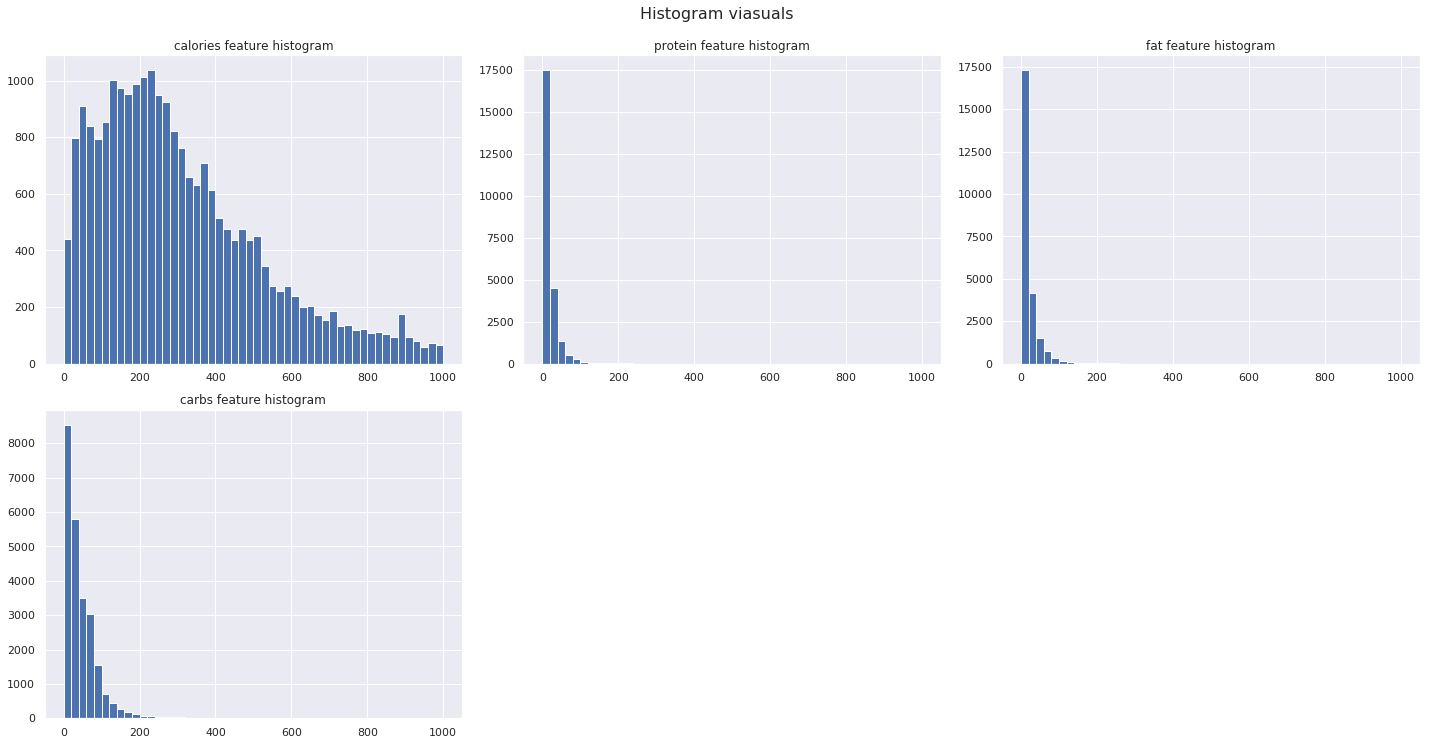

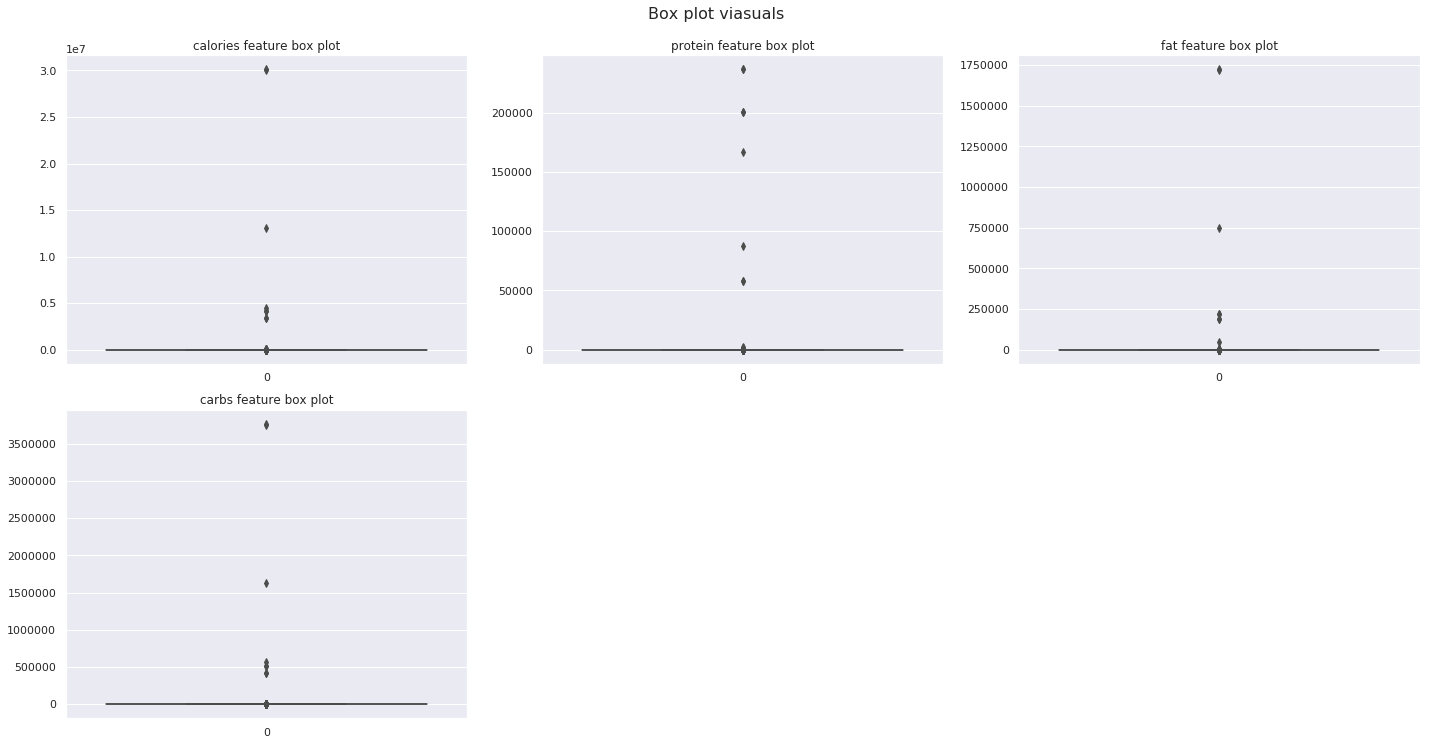

In [111]:
features = ['calories', 'protein', 'fat', 'carbs']

vs.plot_histogram(df, features)
vs.plot_box_plot(df, features)

## Data preparation 

- Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing. 
- This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

## Removing outliers

First step we remove the outliers to clean our data and reduce the propability of classifier misclassifications

,calories,protein,fat,sodium,carbs,is_harm1,is_harm2,is_harm
count,24551.000000,24551.000000,24551.000000,24551.000000,24551.000000,24551.000000,24551.000000,24551.000000
mean,378.732312,17.051511,17.828513,0.548612,45.135359,0.342593,0.106228,0.461488
std,401.225789,28.371808,27.029452,2.361688,52.086072,0.474586,0.308135,0.498525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.000000,3.000000,1.365500,0.056000,11.875000,0.000000,0.000000,0.000000
50%,276.000000,8.000000,9.000000,0.228000,31.875000,0.000000,0.000000,0.000000
75%,472.000000,22.000000,23.000000,0.587000,63.295000,1.000000,0.000000,1.000000
max,6173.000000,898.000000,297.000000,132.220000,771.625000,1.000000,1.000000,1.000000


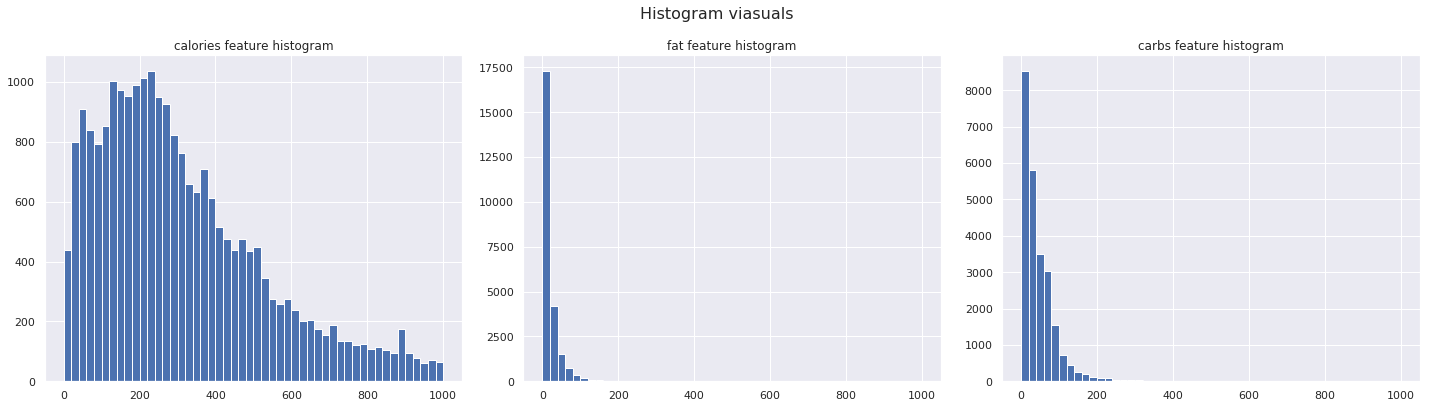

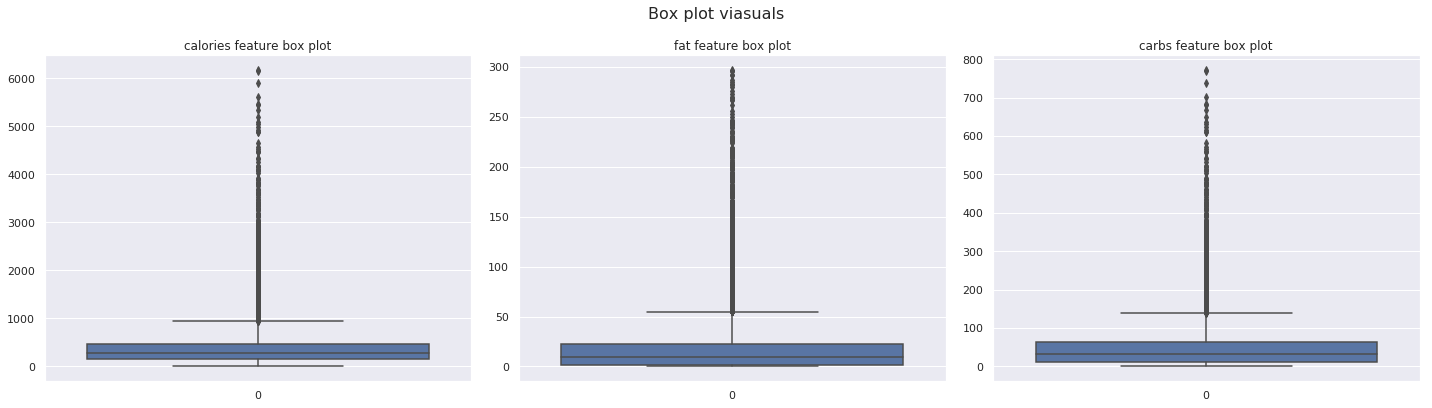

In [112]:
features = ['calories', 'fat', 'carbs']

df.drop(df[df['calories'] > 15000].index, inplace=True)
df.drop(df[df['carbs'] > 800].index, inplace=True)
df.drop(df[df['fat'] > 300].index, inplace=True)

vs.plot_histogram(df, features)
vs.plot_box_plot(df, features)
display(df.describe())

## Data splitting

As we saw in the previous step, the box plot got finner by reducing the outliers. Now we will clean the data even more by splitting the data into features and labels to proceed with the normalization and scaling processes,  also we print some information about our data.

In [113]:
X = df[['calories', 'carbs', 'fat']]
Y = df['is_harm']

all_records = df.shape[0]
healthy_records = df[df['is_harm'] == 0].shape[0]
diabetes_records = df[df['is_harm'] == 1].shape[0]

print("We have {} records".format(all_records))
print("We have {} diabetes records".format(diabetes_records))
print("We have {} healthy records".format(healthy_records))
print("The diabetic perentage is {:.2f} %".format(diabetes_records / all_records * 100))
print("The healthy perentage is {:.2f} %".format(healthy_records / all_records * 100))
print(X.shape)
print(Y.shape)

We have 24551 records
We have 11330 diabetes records
We have 13221 healthy records
The diabetic perentage is 46.15 %
The healthy perentage is 53.85 %
(24551, 3)
(24551,)


## Features Transformation

- A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. 

- For highly-skewed feature distributions, it is common practice to apply a [logarithmic transformation](https://en.wikipedia.org/wiki/Data_transformation_(statistics)) on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

In [0]:
transformed_x = pd.DataFrame(data=X)
transformed_x = X.apply(lambda x: np.log(x + 1))

## Feature normalization (scaling)

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution; however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

In [0]:
from sklearn.preprocessing import MinMaxScaler
import pickle

features_log_minmax_transform = pd.DataFrame(data = transformed_x)

sc = MinMaxScaler() # scale our data to make it robust to our model

sc.fit(transformed_x)
 
features_log_minmax_transform = sc.transform(transformed_x)

with open('scaler.save', 'wb') as f:
    pickle.dump(sc, f)

,calories,fat,carbs
0,0.693941,0.600560,0.365000
1,0.589093,0.466532,0.420898
2,0.733483,0.651752,0.656066
3,0.635771,0.525807,0.314504
4,0.761046,0.687560,0.683124


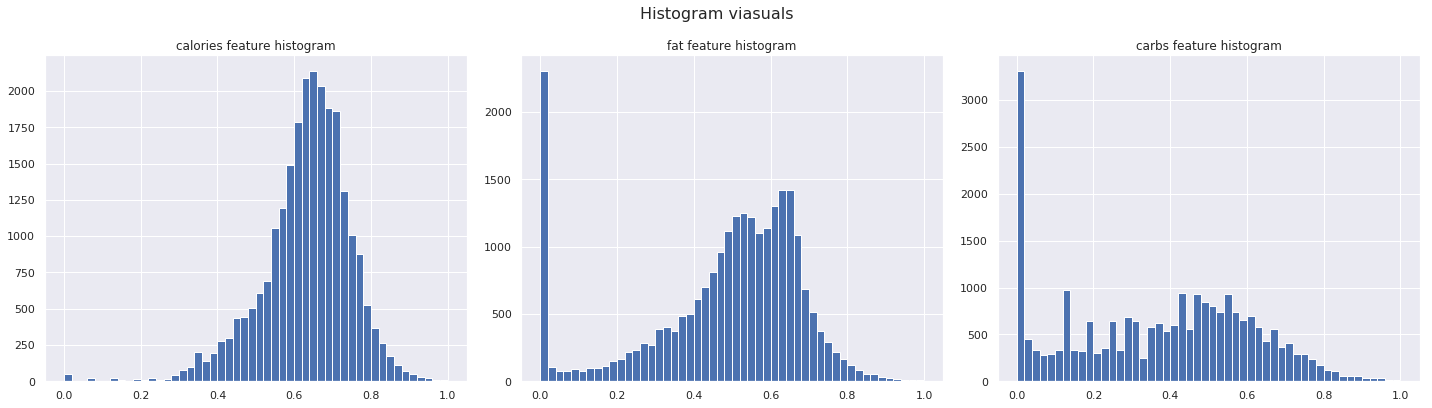

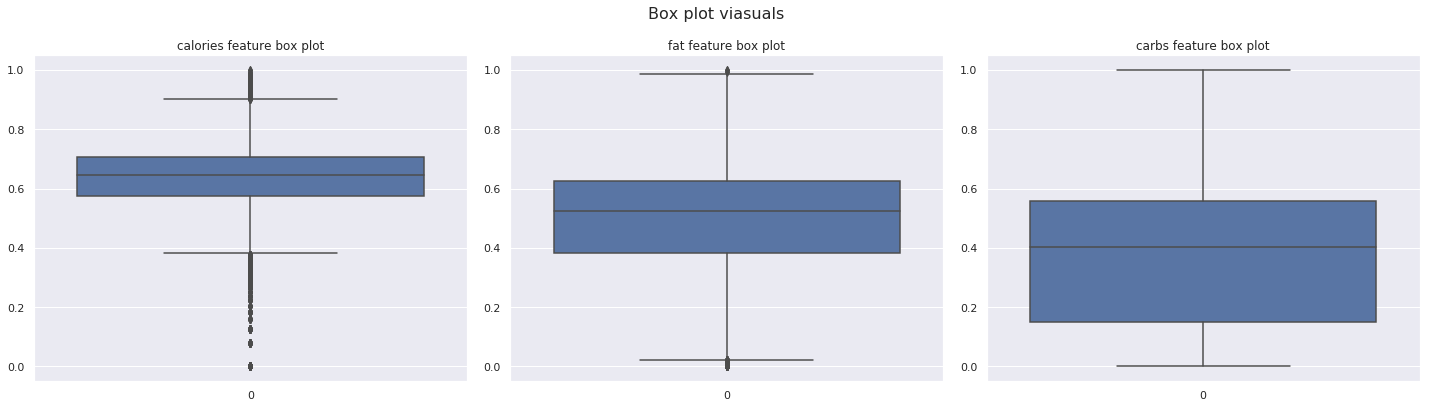

In [116]:
features = ['calories', 'fat', 'carbs']
X = pd.DataFrame(data=features_log_minmax_transform, columns=features)

display(X.head())

vs.plot_histogram(X, features, preprocessed = True)
vs.plot_box_plot(X, features)

## Shuffle and split data

We prepare our features and labels for the training process, so we split the data into training and testing splits, and make 80% of our data as training data and the other 20% as testing data and then print the stats of the splits.

In [1]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)    

display(X_train.head())
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

NameError: name 'X' is not defined

## Model Selection

In this section, we will investigate four different algorithms, and determine which is best at modeling the data.
we will compare between SVM and gradient boosting

In [0]:
# Here we try some of the algorithms that i think is the most powerful candidates to our problem
from sklearn.svm import SVC
from sklearn.ensemble  import GradientBoostingClassifier


clf_A = SVC(kernel = 'linear', random_state = 5)
clf_B = GradientBoostingClassifier(random_state=70)

clf_A.fit(X_train, y_train)
clf_B.fit(X_train, y_train)


y_pred_A = clf_A.predict(X_test)
y_pred_B = clf_B.predict(X_test)

## Models evaluation 

In this section, we will investigate four different algorithms, and determine which is best at modeling the data.

### Metrics and the Naive Predictor
 We can use F-beta score as a metric that considers both precision and recall:

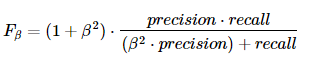 

In particular, when  β=0.7 , more emphasis is placed on recall. This is called the F 0.7  score (or F-beta score for simplicity).

#### Note: Recap of accuracy, precision, recall
Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

Precision tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

Recall(sensitivity) tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

In [119]:
# Here we print the results of each one

from sklearn.metrics import fbeta_score

A_fbeta_score = fbeta_score(y_test, y_pred_A, beta=0.7)

B_fbeta_score = fbeta_score(y_test, y_pred_B, beta=0.7)


print ("svm fbeta score ", A_fbeta_score*100)
print("----------------------------------------------------")
print ("Gradient Boosting fbeta score ",B_fbeta_score * 100)

svm fbeta score  99.49908953051442
----------------------------------------------------
Gradient Boosting fbeta score  100.0


## Choosing the best model

I think that gradient boosting is very powerful to our small data, so i think that we should use SVM, and with some hyper parameter tuning we can get a very good results.

Implementation: Model Tuning
Fine tune the chosen model. Use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. We will need to use the entire training set for this.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, r2_score, fbeta_score
from sklearn.model_selection import ShuffleSplit


def grid_search(clf, parameters, X_train, y_train):
    cv_sets = ShuffleSplit(n_splits=3,test_size=0.2) # define the cross validation function
    scorer = make_scorer(fbeta_score, beta=0.7) # Define the scorer function 
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=cv_sets) # Initilize the grid object
    grid_fit = grid_obj.fit(X_train, y_train) # train the grid object
    return grid_fit.best_estimator_  # Obtaining the best classifier

In [0]:
#Here i have chossen gradient boosting as the best algorithm and i use grid search to return the best estimator

# clf = GradientBoostingClassifier(random_state=42) # Initialize the classifer

# parameters = {'n_estimators': [5, 10, 20, 30, 40, 50, 100],
#               'learning_rate': [0.001, 0.01, 0.1, 1, 1.5]
#              } # Choosing the set of parameters


clf1 = SVC(kernel='poly', random_state = 7)

parameters1 = {
              'degree': [2, 3],
              'C': [0.001, 0.01, 0.1]} 


best_clf1 = grid_search(clf1, parameters1, X_train, y_train)

best_clf1.fit(X_train, y_train) # Training the new (best)classifier
best_predictions = best_clf1.predict(X_test) # Predicting resulsts 


In [122]:
print("Best parameter values is", best_clf1.get_params())

print ("\n Unoptimized model\n------")
print ("Fbeta-score on testing data: {:.4f}".format(A_fbeta_score))
print ("\nOptimized Model\n------")
print ("Final Fbeta-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.7)))

Best parameter values is {'C': 0.1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': 7, 'shrinking': True, 'tol': 0.001, 'verbose': False}

 Unoptimized model
------
Fbeta-score on testing data: 0.9950

Optimized Model
------
Final Fbeta-score on the testing data: 0.9603


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)
Normalized confusion matrix
[[0.96166605 0.03833395]
 [0.02593267 0.97406733]]


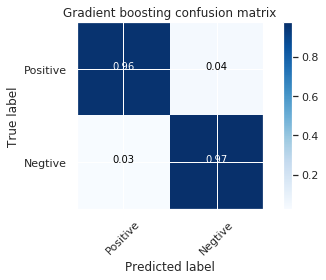

In [123]:
print(best_clf1)
my_conf_matrix = confusion_matrix(y_test, best_predictions) # Calculating the confussion matrix
vs.plot_confusion_matrix(my_conf_matrix, classes=['Positive', 'Negtive'], normalize=True, title="Gradient boosting confusion matrix")

In [124]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, r2_score, fbeta_score
from sklearn.model_selection import ShuffleSplit

clf2 = SVC(kernel='rbf', random_state = 5)

parameters2 = {
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'C': [0.001, 0.01, 0.1]} 

best_clf2 = grid_search(clf2, parameters2, X_train, y_train)

best_clf2.fit(X_train, y_train) # Training the new (best)classifier
best_predictions = best_clf2.predict(X_test) # Predicting resulsts 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

In [125]:
train_score = fbeta_score(y_train, best_clf2.predict(X_train), beta = 0.7)

print("Best parameter values is", best_clf2.get_params())

print ("\n Unoptimized model\n------")
print ("Fbeta-score on training data: {:.4f}".format(train_score))
print ("Fbeta-score on testing data: {:.4f}".format(A_fbeta_score))
print ("\nOptimized Model\n------")
print ("Final Fbeta-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.7)))

Best parameter values is {'C': 0.1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 5, 'shrinking': True, 'tol': 0.001, 'verbose': False}

 Unoptimized model
------
Fbeta-score on training data: 0.9567
Fbeta-score on testing data: 0.9950

Optimized Model
------
Final Fbeta-score on the testing data: 0.9539


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=5, shrinking=True,
  tol=0.001, verbose=False)
Normalized confusion matrix
[[0.9487652  0.0512348 ]
 [0.01546861 0.98453139]]


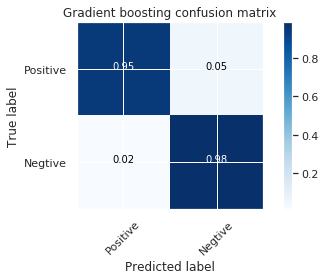

In [126]:
print(best_clf2)
my_conf_matrix = confusion_matrix(y_test, best_predictions) # Calculating the confussion matrix
vs.plot_confusion_matrix(my_conf_matrix, classes=['Positive', 'Negtive'], normalize=True, title="Gradient boosting confusion matrix")

In [0]:

clf1 = SVC(kernel='linear', random_state = 7)

parameters3 = {'C': [0.001, 0.01, 0.1]} 


best_clf3 = grid_search(clf1, parameters1, X_train, y_train)

best_clf3.fit(X_train, y_train) # Training the new (best)classifier
best_predictions = best_clf3.predict(X_test) # Predicting resulsts 

In [128]:
train_score = fbeta_score(y_train, best_clf3.predict(X_train), beta = 0.7)

print("Best parameter values is", best_clf3.get_params())

print ("\n Unoptimized model\n------")
print ("Fbeta-score on training data: {:.4f}".format(train_score))
print ("Fbeta-score on testing data: {:.4f}".format(A_fbeta_score))
print ("\nOptimized Model\n------")
print ("Final Fbeta-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.7)))

Best parameter values is {'C': 0.1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 7, 'shrinking': True, 'tol': 0.001, 'verbose': False}

 Unoptimized model
------
Fbeta-score on training data: 0.9775
Fbeta-score on testing data: 0.9950

Optimized Model
------
Final Fbeta-score on the testing data: 0.9763


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=5, shrinking=True,
  tol=0.001, verbose=False)
Normalized confusion matrix
[[0.97382971 0.02617029]
 [0.00727934 0.99272066]]


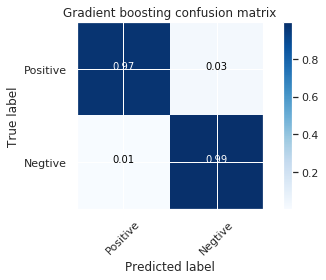

In [129]:
print(best_clf2)
my_conf_matrix = confusion_matrix(y_test, best_predictions) # Calculating the confussion matrix
vs.plot_confusion_matrix(my_conf_matrix, classes=['Positive', 'Negtive'], normalize=True, title="Gradient boosting confusion matrix")

## Saving the model

In [0]:
import pickle

with open('best_poly.pickle', 'wb') as f:
 pickle.dump(best_clf1, f)
  
with open('best_rbf.pickle', 'wb') as f:
 pickle.dump(best_clf2, f)
  
with open('best_linear.pickle', 'wb') as f:
  pickle.dump(best_clf3, f)

## Predicting results

In [0]:
import pickle

  
with open('scaler.save', 'rb') as f:
    sc = pickle.load(f)  # loading the saved model
    
    
# Here i'm defining a function for you to ease the testing process for you, 
# all you have to do is to provide the feature array in the next code cell

def predict_diabetes(clf, arr):
  
    my_arr = np.log(arr + 1)
    my_arr = sc.transform(my_arr.reshape(1, -1))
    print(arr)
    print(my_arr)
    results = clf.predict(my_arr)
    print(clf)
    
    return results

In [137]:
import pickle

#['calories','fat', 'carbs']
# [457.3, 15.71, 22.33]
# [100, 10, 15.25]

my_arr = np.array([100, 10, 15.25]) # <== pass the features array here

with open('best_poly.pickle', 'rb') as f:
    loaded_clf = pickle.load(f) # loading the saved model

result = predict_diabetes(loaded_clf, my_arr) # Invoking the predicting funcrion

print(result)
if result == 1:
    print("Harmful !")
elif result == 0:
    print("Healthy !")

[100.    10.    15.25]
[[0.52876564 0.36059694 0.48938865]]
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)
[0]
Healthy !


In [133]:
print(sklearn.__version__)

0.19.1
